In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [10]:
cap = cv2.VideoCapture('movie_average/video.mp4')

In [17]:
ret, frame = cap.read()

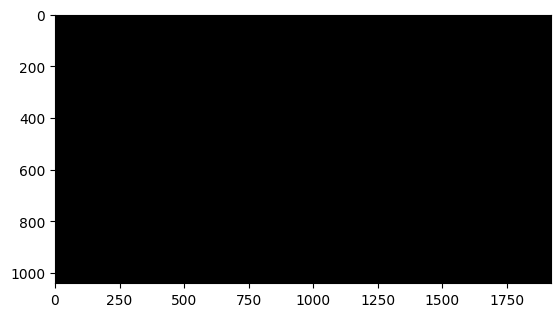

In [18]:
plt.imshow(frame)

In [89]:
import cv2
import numpy as np

# Open the video
cap = cv2.VideoCapture('movie_average/harrypotter.mp4')

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
every = 100
duration_seconds = total_frames // fps // every # Total video duration in seconds

# Initialize an array for accumulating frames
sum_frame = np.zeros((frame_height, frame_width, 3), dtype=np.float32)
for sec in tqdm(range(duration_seconds)):
    cap.set(cv2.CAP_PROP_POS_FRAMES, every * sec * fps)  # Move to the frame at this second
    ret, frame = cap.read()
    mask = frame > 50
    sum_frame[mask] += frame[mask]

cap.release()


100%|██████████| 86/86 [00:23<00:00,  3.72it/s]


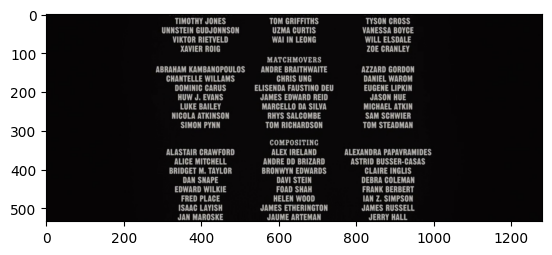

In [87]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

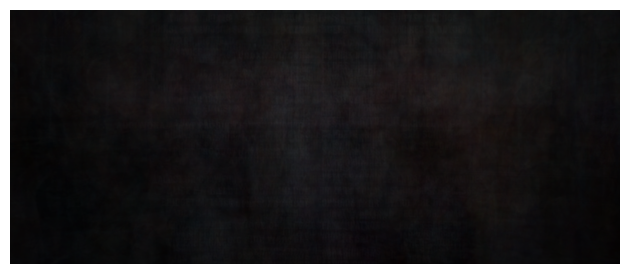

In [90]:
avg_frame = (sum_frame / (duration_seconds)).astype(np.uint8)
plt.axis("off") 
plt.tight_layout()
plt.imshow(cv2.cvtColor(avg_frame, cv2.COLOR_BGR2RGB))


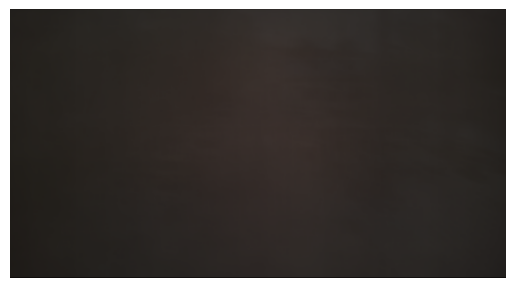

(1040, 1920, 3)


In [ ]:
import numpy as np
import cv2

def compute_temporal_average(video_path):
    """
    Computes the temporal average of a video efficiently without storing all frames in memory.
    
    Parameters:
    video_path (str): Path to the video file.
    
    Returns:
    numpy.ndarray: The temporal average of the video, with shape (height, width, channels).
    """
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if the video opened successfully
    if not cap.isOpened():
        raise ValueError("Error opening video file.")
    
    # Get the video frame properties
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Total number of frames in the video
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Initialize a variable to store the sum of all frames
    frame_sum = np.zeros((frame_height, frame_width, 3), dtype=np.float32)
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break  # End of video
        
        # Convert the frame to RGB (OpenCV uses BGR by default)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Add the current frame to the sum
        frame_sum += frame_rgb
        frame_count += 1
    
    cap.release()
    
    # Compute the temporal average by dividing the accumulated sum by the number of frames
    temporal_average = frame_sum / frame_count
    
    return temporal_average.astype(np.uint8)  # Convert the result back to uint8 type for image representation

# Example usage:
video_path = 'video.mp4'

# Compute temporal average
avg_frame = compute_temporal_average(video_path)0

# Display the resulting temporal average frame (optional)
import matplotlib.pyplot as plt

plt.imshow(avg_frame)
plt.axis('off')  # Hide axes
plt.show()

print(avg_frame.shape)  # Output should be (height, width, channels)
